<a href="https://colab.research.google.com/github/bipulsimkhada/RNN-Stock-Prediction/blob/main/Stock_Price_Prediction_Using_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recurrent Neural Network

To predict Google stock for 20 days of Jan 2017 using stock dataset from Jan 2012 to Dec 2016.  Using Long short-term memory networks (LSTM) which is subset of RNN

## Part 1 - Data Preprocessing
To predict Google stock price for 20 days of Jan 2017 using dataset of stock price from Jan 2012-Dec 2016 using Long Short-Term Memory networks (LSTM) - varient of Recurrent Neural Networks (RNN)

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train =[]
total_data = training_set_scaled.shape[0]
days = 60 # 60 days of data used to predit 60 plus 1 day stock price
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
y_train.shape

(1198,)

### Reshaping

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 136ms/step - loss: 0.0545
Epoch 2/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
X_test.shape

(20, 60, 1)

### Visualising the results

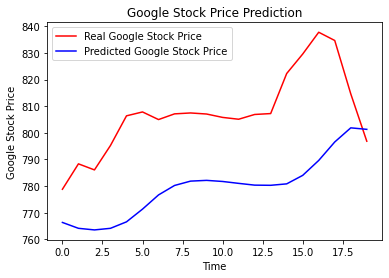

In [ ]:
plt.plot(real_stock_price,color='red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label ='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()